<a href="https://colab.research.google.com/github/dustinober1/Spam-Filtering/blob/main/Spam_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Filtering

In [1]:
import pandas as pd
 
df = pd.read_csv('https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%204/Data/ham-spam.csv')
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


Now check for duplicate rows in the dataset:

In [2]:
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  take the reinsbecomeyour employer substantial ...    1

The dataset contains one duplicate row. Let’s remove it and check for balance:

In [3]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

The dataset now contains 499 samples that are not spam, and 500 that are. The next step is to use CountVectorizer to vectorize the emails. Once more, we’ll allow CountVectorizer to consider word pairs as well as individual words and remove stop words using Scikit’s built-in dictionary of English stop words:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

Split the dataset so that 80% can be used for training and 20% for testing:

In [5]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

The next step is to train a Naive Bayes classifier using Scikit’s MultinomialNB class:

In [6]:
from sklearn.naive_bayes import MultinomialNB
 
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

Validate the trained model with the 20% of the dataset set aside for testing using a confusion matrix:

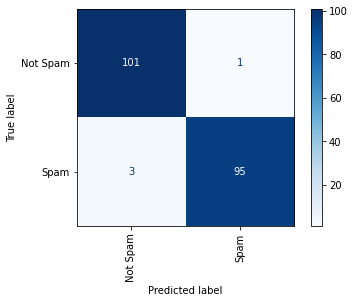

In [7]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Not Spam', 'Spam'],
                   cmap='Blues', xticks_rotation='vertical')

Use the score method to get a rough measure of the model’s accuracy:

In [8]:
model.score(x_test, y_test)

0.98

Now use Scikit’s RocCurveDisplay class to visualize the ROC curve:



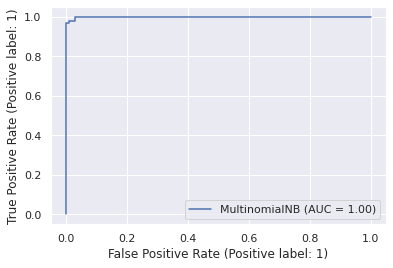

In [9]:
from sklearn.metrics import RocCurveDisplay as rcd
import seaborn as sns
sns.set()

rcd.from_estimator(model, x_test, y_test)

Let’s see how the model classifies a few emails that it hasn’t seen before, starting with one that isn’t spam. The model’s predict method predicts a class—0 for not spam, or 1 for spam:

In [10]:
msg = 'Can you attend a code review on Tuesday to make sure the logic is solid?'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [11]:
model.predict_proba(input)[0][0]

0.9999497111473539

In [12]:
msg = 'Why pay more for expensive meds when you can order them online ' \
      'and save $$$?'

input = vectorizer.transform([msg])
model.predict(input)[0]

1

What is the probability that the message is not spam?

In [13]:
model.predict_proba(input)[0][0]

0.00021423891260677753

What is the probability that the message is spam?

In [14]:
model.predict_proba(input)[0][1]

0.9997857610873945